# Data Analytics - Lab 1 - Random data visualisation and sampling

<span style="font-size: 20px;">
Konrad Prokop, 408687
</span>

1. Create a Jupyter notebook.
2. Using `numpy.random` generate arrays of:
   - 1000 samples of uniform distribution on interval $[0,1]$
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=1$.
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=10$.
   - 1000 samples of beta distribution for the following pairs of parameters $(\alpha,\beta)\in\{(1,1), (2,2),(3,9)\}$
   - 10000 samples of two-dimensional normal distributions each with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrices

$$
\Sigma_1=\begin{bmatrix}1&0\\0&1\end{bmatrix}
$$

$$
\Sigma_2=\begin{bmatrix}2&1\\1&2\end{bmatrix}
$$

3. For one-dimensional distributions, plot histograms. Assign bin values to represent the geometry of the distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see e.g., Wikipedia).
4. For two-dimensional distributions, use the `hist2d` method from `pyplot`. Try to analyze the influence of bins. Try different 2d histogram functions (e.g., from `seaborn`).
5. Generate 1000 $y$ points from the following model (First sample $\alpha,\ \beta,\ x, \ \sigma$, then compute $\mu$ algebraically, then sample a value of $y$. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of the result)

$$
\begin{aligned}
y\sim{}& \text{Normal}(\mu, \sigma)\\
\mu={}& \alpha + \beta x\\
\alpha\sim{}&\text{Normal}(2,0.1)\\
\beta\sim{}&\text{Normal}(0.2,0.2)\\
x\sim{}&\text{Normal}(0,3)\\
\sigma\sim{}&\text{HalfNormal}(0,1)
\end{aligned} 
$$

6. Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of the randomly sampled $\alpha$ and $\beta$ pairs (on the same plot).  
 


<font size="5">


Solution

Ex. 1 and 2

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta
import seaborn as sns

uniform_samples = np.random.uniform(0, 1, 1000)

normal_samples_mean_0_std_1 = np.random.normal(0, 1, 1000)

normal_samples_mean_0_std_10 = np.random.normal(0, 10, 1000)

beta_samples_1_1 = np.random.beta(1, 1, 1000)
beta_samples_2_2 = np.random.beta(2, 2, 1000)
beta_samples_3_9 = np.random.beta(3, 9, 1000)

mean = [0, 0]
covariance_matrix_1 = [[1, 0], [0, 1]]
covariance_matrix_2 = [[2, 1], [1, 2]]

multi_normal_samples_1 = np.random.multivariate_normal(mean, covariance_matrix_1, 10000)
multi_normal_samples_2 = np.random.multivariate_normal(mean, covariance_matrix_2, 10000)

Ex. 3

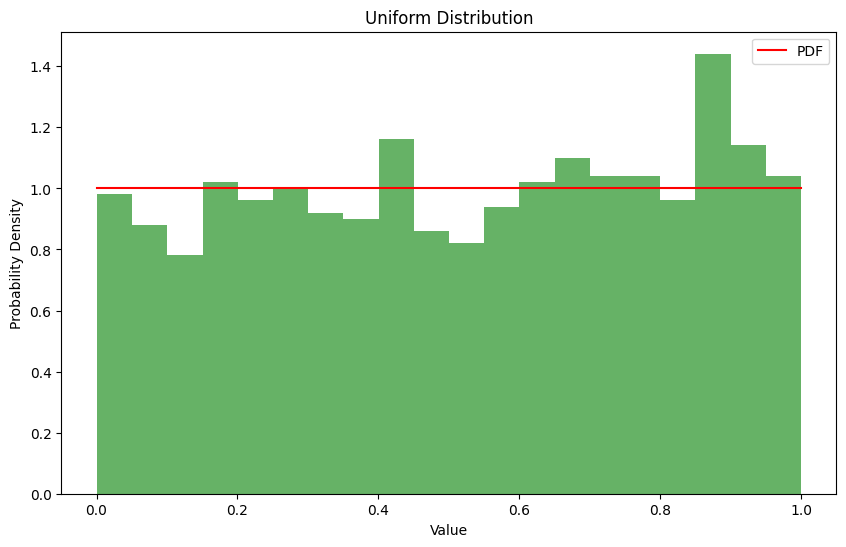

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(uniform_samples, bins=20, density=True, alpha=0.6, color='g')
plt.plot(np.linspace(0, 1, 1000), np.full_like(np.linspace(0, 1, 1000), 1), 'r', label='PDF')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

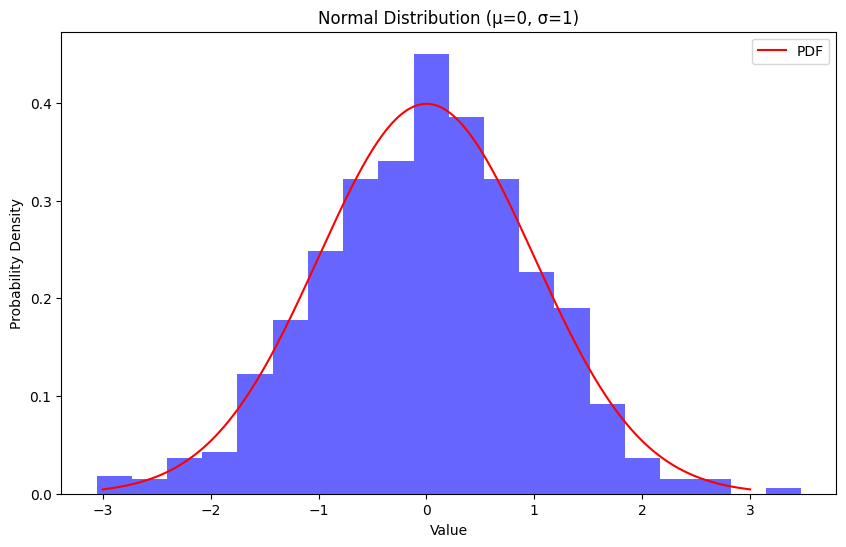

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(normal_samples_mean_0_std_1, bins=20, density=True, alpha=0.6, color='b')
plt.plot(np.linspace(-3, 3, 1000), norm.pdf(np.linspace(-3, 3, 1000), loc=0, scale=1), 'r', label='PDF')
plt.title('Normal Distribution (μ=0, σ=1)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

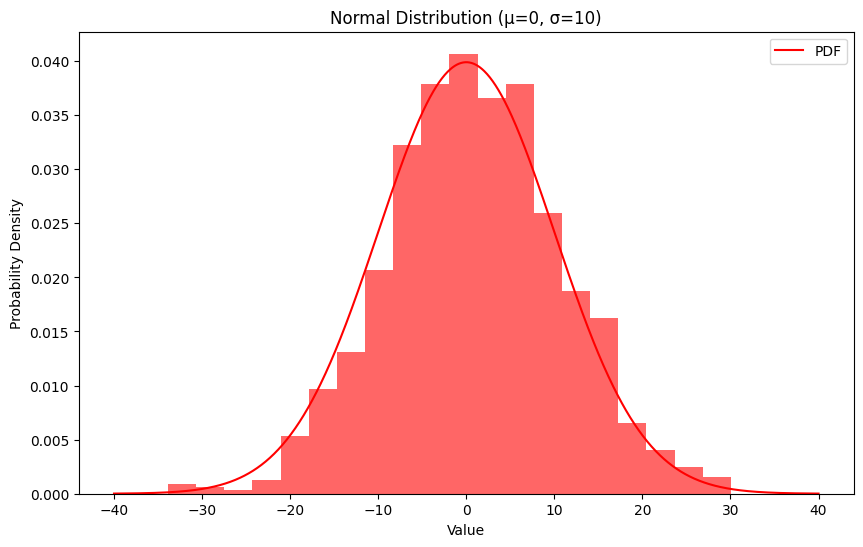

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(normal_samples_mean_0_std_10, bins=20, density=True, alpha=0.6, color='r')
plt.plot(np.linspace(-40, 40, 1000), norm.pdf(np.linspace(-40, 40, 1000), loc=0, scale=10), 'r', label='PDF')
plt.title('Normal Distribution (μ=0, σ=10)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

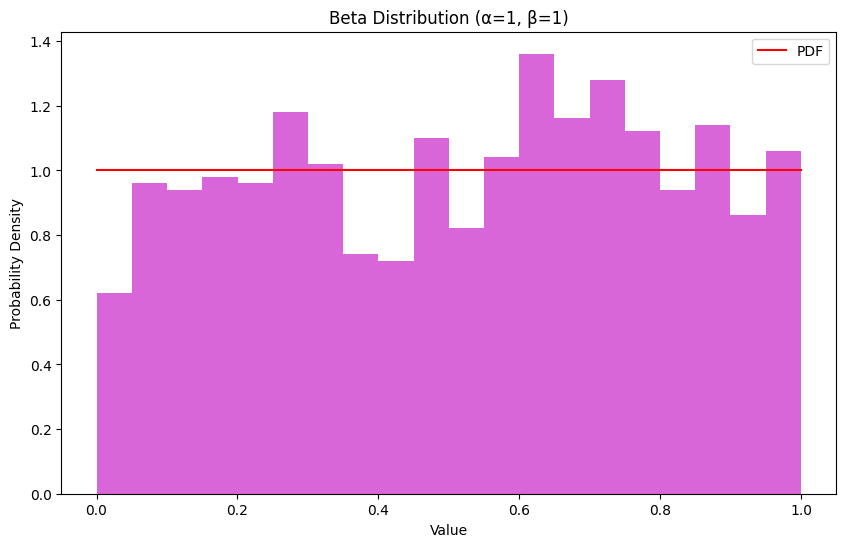

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(beta_samples_1_1, bins=20, density=True, alpha=0.6, color='m')
plt.plot(np.linspace(0, 1, 1000), beta.pdf(np.linspace(0, 1, 1000), a=1, b=1), 'r', label='PDF')
plt.title('Beta Distribution (α=1, β=1)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

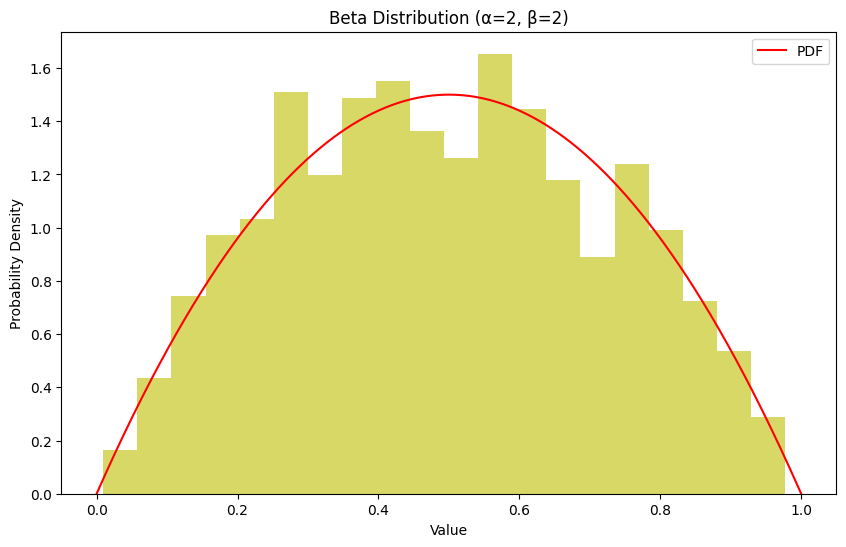

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(beta_samples_2_2, bins=20, density=True, alpha=0.6, color='y')
plt.plot(np.linspace(0, 1, 1000), beta.pdf(np.linspace(0, 1, 1000), a=2, b=2), 'r', label='PDF')
plt.title('Beta Distribution (α=2, β=2)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

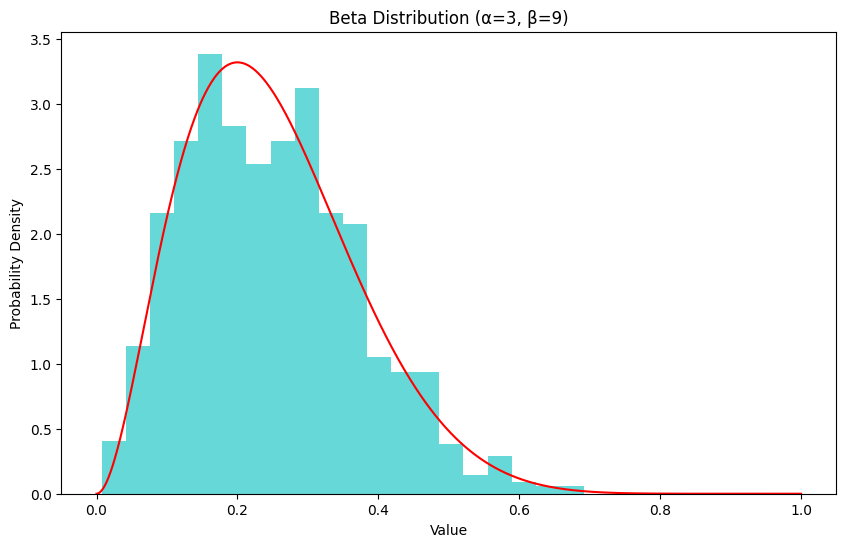

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(beta_samples_3_9, bins=20, density=True, alpha=0.6, color='c')
plt.plot(np.linspace(0, 1, 1000), beta.pdf(np.linspace(0, 1, 1000), a=3, b=9), 'r', label='PDF')
plt.title('Beta Distribution (α=3, β=9)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.tight_layout
plt.show

Ex. 4

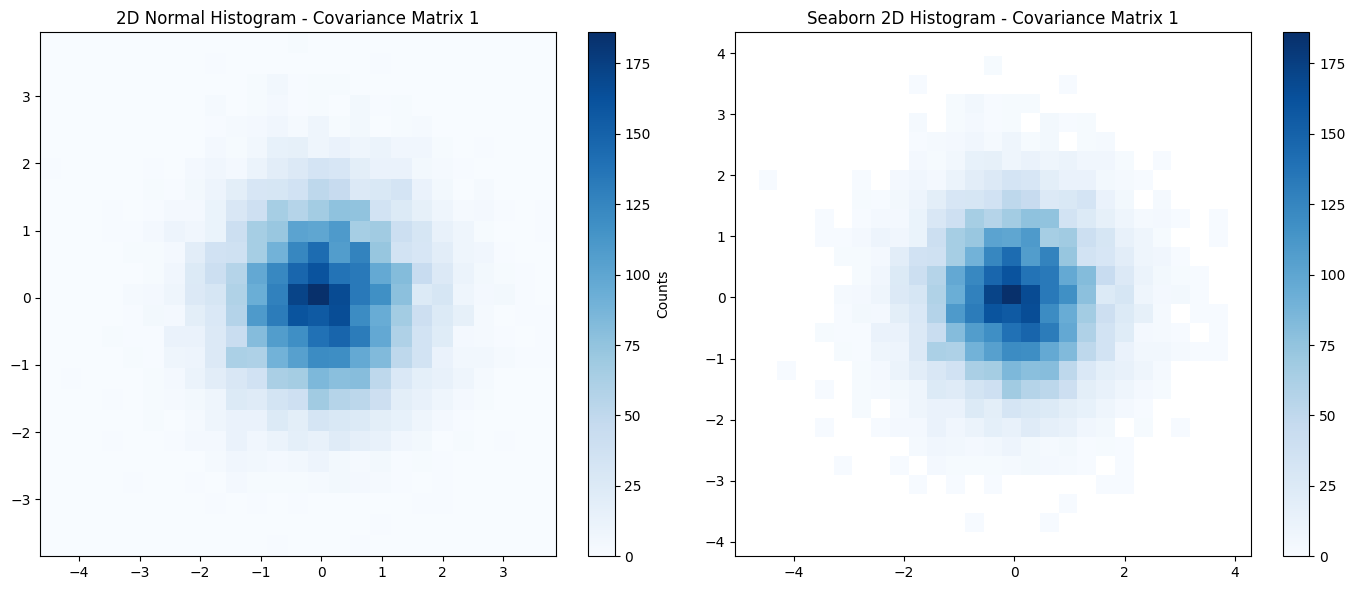

In [64]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist2d(multi_normal_samples_1[:,0], multi_normal_samples_1[:,1], bins=25, cmap='Blues')
plt.colorbar(label='Counts')
plt.title('2D Normal Histogram - Covariance Matrix 1')

plt.subplot(1, 2, 2)
sns.histplot(x=multi_normal_samples_1[:,0], y=multi_normal_samples_1[:,1], bins=25, cmap='Blues', cbar=True)
plt.title('Seaborn 2D Histogram - Covariance Matrix 1')

plt.tight_layout()
plt.show()

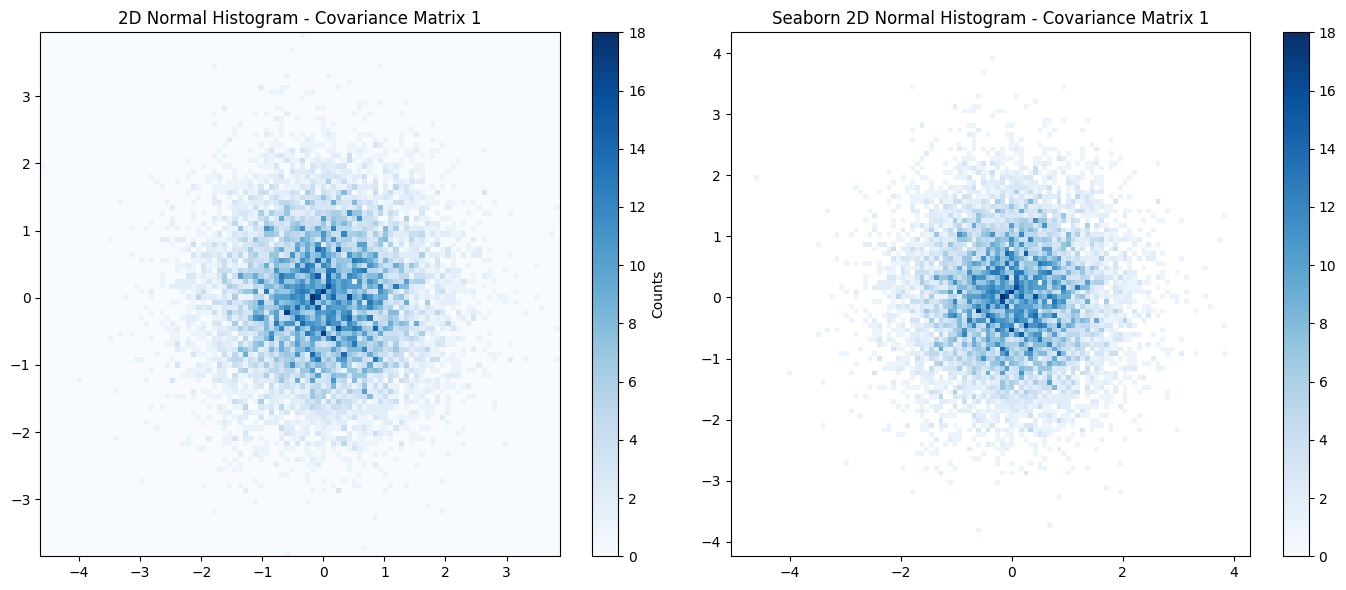

In [65]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist2d(multi_normal_samples_1[:,0], multi_normal_samples_1[:,1], bins=100, cmap='Blues')
plt.colorbar(label='Counts')
plt.title('2D Normal Histogram - Covariance Matrix 1')

plt.subplot(1, 2, 2)
sns.histplot(x=multi_normal_samples_1[:,0], y=multi_normal_samples_1[:,1], bins=100, cmap='Blues', cbar=True)
plt.title('Seaborn 2D Normal Histogram - Covariance Matrix 1')

plt.tight_layout()
plt.show()

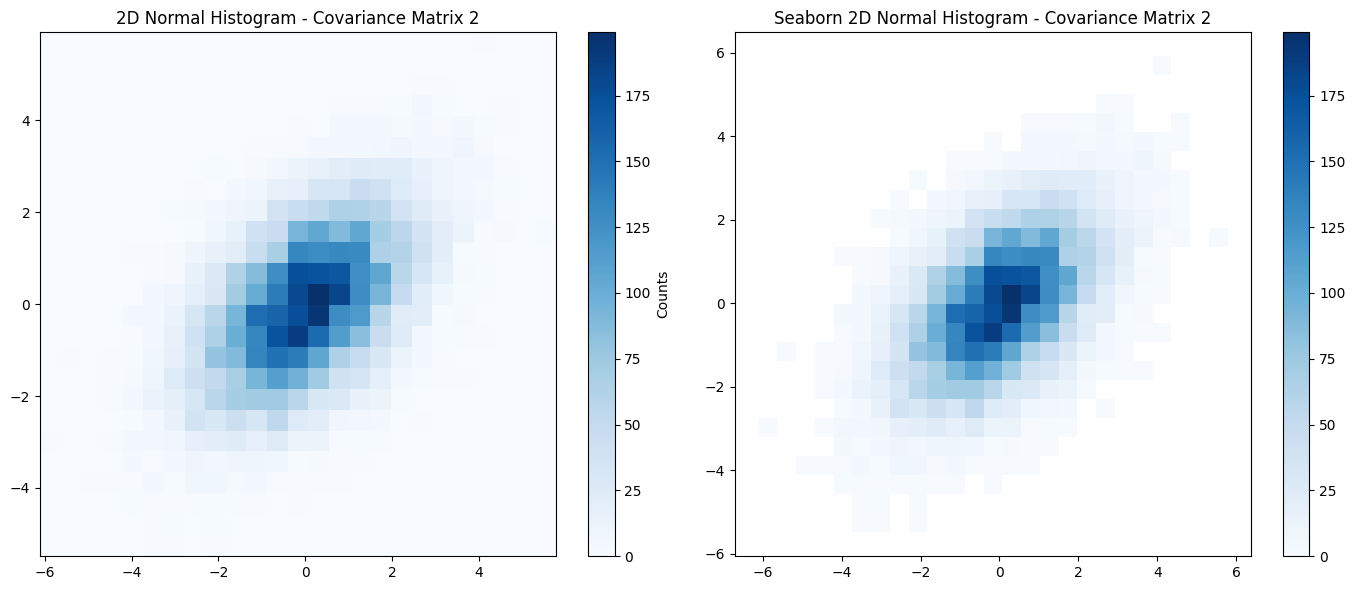

In [66]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist2d(multi_normal_samples_2[:,0], multi_normal_samples_2[:,1], bins=25, cmap='Blues')
plt.colorbar(label='Counts')
plt.title('2D Normal Histogram - Covariance Matrix 2')

plt.subplot(1, 2, 2)
sns.histplot(x=multi_normal_samples_2[:,0], y=multi_normal_samples_2[:,1], bins=25, cmap='Blues', cbar=True)
plt.title('Seaborn 2D Normal Histogram - Covariance Matrix 2')

plt.tight_layout()
plt.show()

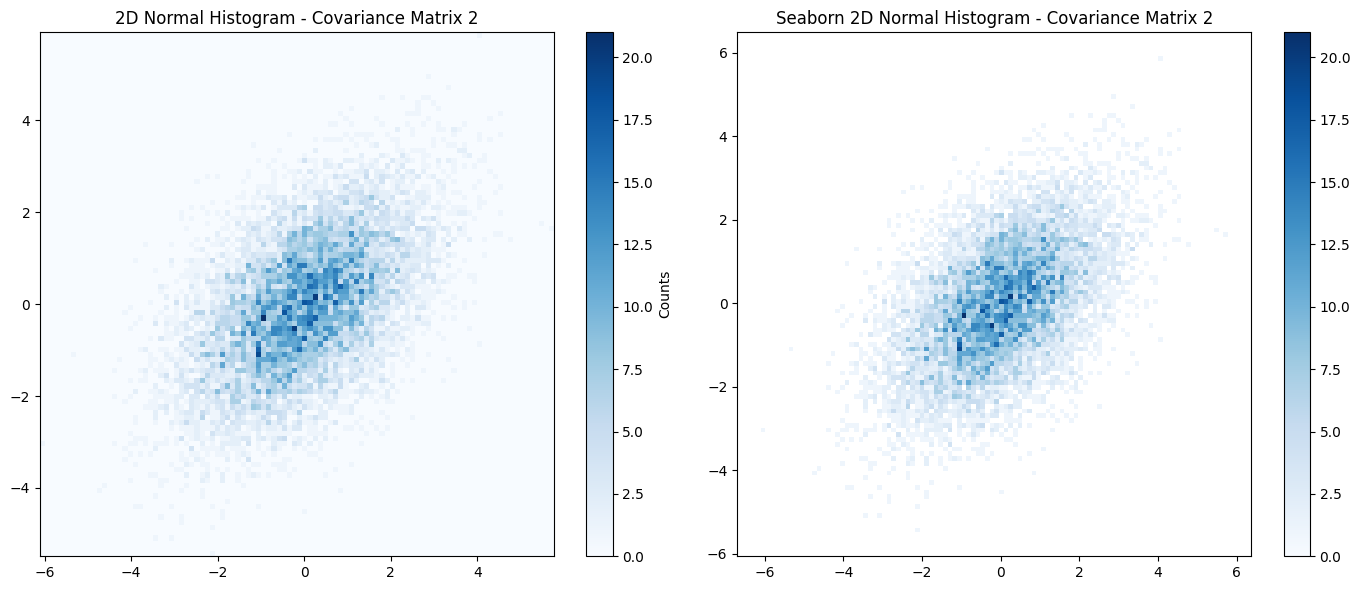

In [67]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist2d(multi_normal_samples_2[:,0], multi_normal_samples_2[:,1], bins=100, cmap='Blues')
plt.colorbar(label='Counts')
plt.title('2D Normal Histogram - Covariance Matrix 2')

plt.subplot(1, 2, 2)
sns.histplot(x=multi_normal_samples_2[:,0], y=multi_normal_samples_2[:,1], bins=100, cmap='Blues', cbar=True)
plt.title('Seaborn 2D Normal Histogram - Covariance Matrix 2')

plt.tight_layout()
plt.show()

Ex. 5

In [68]:
alpha = np.random.normal(2, 0.1, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
x = np.random.normal(0, 3, 1000)
sigma = np.abs(np.random.normal(0, 1, 1000))
mi = alpha + beta * x
y = np.random.normal(mi, sigma)

Ex. 6

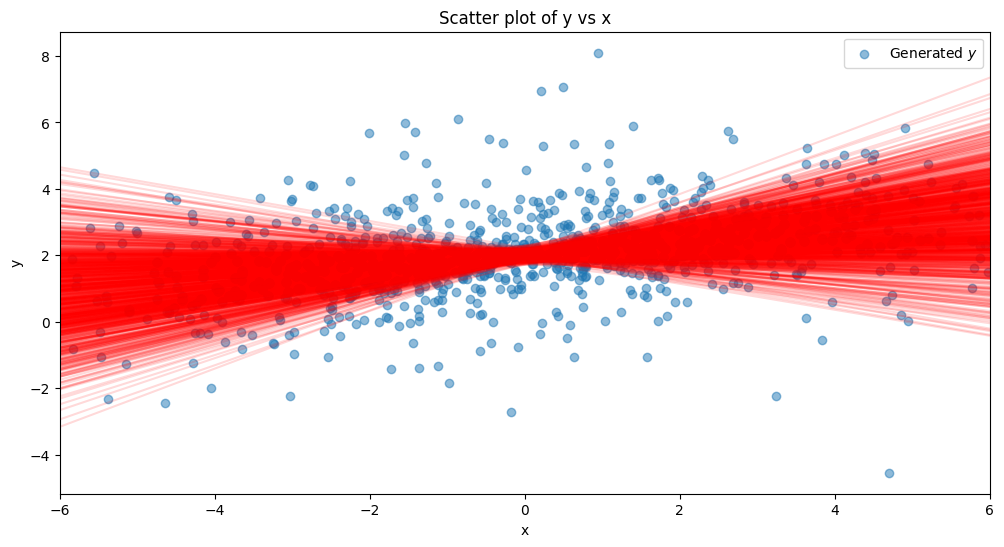

In [69]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.5, label='Generated $y$')
plt.title('Scatter plot of y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-6, 6])

exs = np.linspace(-6, 6, 1000)
for a, b in zip(alpha, beta):
    alpha_sample = np.random.choice(alpha)
    beta_sample = np.random.choice(beta)
    plt.plot(exs, alpha_sample + beta_sample * exs, color='r', alpha=0.15)
plt.legend()
plt.show()